In [2]:
# 0.  사용할 패키지 불러오기 (mnist : 손글씨)
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

In [3]:
# 1. Dataset

# 훈련셋과 시험셋 불러오기
(x_train,y_train), (x_test,y_test) = mnist.load_data()

#데이터셋 전처리
x_train = x_train.reshape(60000,784).astype('float32') / 255.0
x_test = x_test.reshape(10000,784).astype('float32') / 255.0

# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 훈련셋과 검증셋 분리
x_val = x_train[42000:]
x_train = x_train[:42000]
y_val = y_train[42000:]
y_train = y_train[:42000]

In [4]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(64, input_dim=28*28, activation='relu'))
model.add(Dense(10, activation='softmax'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])


Instructions for updating:
keep_dims is deprecated, use keepdims instead



In [6]:
# 4. 모델 학습시키기
model.fit(x_train, y_train, nb_epoch=5, batch_size=32,validation_data=(x_val,y_val))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 42000 samples, validate on 18000 samples
Epoch 1/5


42000/42000 [==============================] - 2s - loss: 0.7804 - acc: 0.8054 - val_loss: 0.4254 - val_acc: 0.8868
Epoch 2/5
42000/42000 [==============================] - 1s - loss: 0.3867 - acc: 0.8941 - val_loss: 0.3463 - val_acc: 0.9017
Epoch 3/5
42000/42000 [==============================] - 1s - loss: 0.3309 - acc: 0.9071 - val_loss: 0.3119 - val_acc: 0.9119
Epoch 4/5
42000/42000 [==============================] - 1s - loss: 0.3003 - acc: 0.9155 - val_loss: 0.2890 - val_acc: 0.9163
Epoch 5/5
42000/42000 [==============================] - 1s - loss: 0.2782 - acc: 0.9213 - val_loss: 0.2705 - val_acc: 0.9228


In [7]:
# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print ''
print 'loss_and_metrics' + str(loss_and_metrics)

 8000/10000 [=======================>......] - ETA: 0s
loss_and_metrics[0.2604993213891983, 0.9274]


In [8]:
# 6. 모델 저장하기
from keras.models import load_model
model.save('mnist_mlp_model.h5')

저장된 파일에는 다음의 정보가 담겨져 있음<br>
1. 나중에 모델을 재구성하기 위한 모델의 구성 정보
2. 모델을 구성하는 각 뉴런들의 가중치
3. 손실함수, 최적화하기 등의 학습 설정
4. 재학습을 할 수 있도록 마지막 학습상태

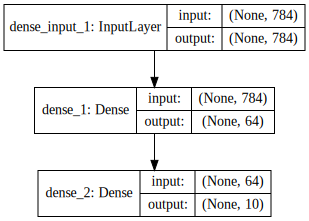

In [10]:
# 7. 모델 아키덱처 보기(mac에서는 불가능)
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

모델 아키텍처는 model.to_json()와 model.to_yaml() 함수를 이용하여 json, yaml 형식의 파일로 저장 가능<br> 
<br>
from models import model_from_json<br>
json_string = model.to_json() # 모델 아키텍처를 json 형식으로 저장<br>
model = model_from_json(json_string) # json 파일에서 모델 아키텍처 재구성<br>
<br>
from models import model_from_yaml<br>
yaml_string = model.to_yaml() # 모델 아키텍처를 yaml 형식으로 저장<br>
model = model_from_yaml(yaml_string) # yaml 파일에서 모델 아키텍처 재구성<br>
